# Project - Wine Quality

## Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

we need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!





## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Renaming & Calling the dataset 'Wine Quality' as df.

In [2]:
df=pd.read_csv('winequalityproject.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Checking the data shape

In [63]:
df.shape

(1599, 12)

The data has 1599 no of rows and 12 no of columns

### Checking the data-types under the respective columns.

In [64]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Obtaining the column names inolved in our dataset.

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Checking the null values

In [66]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There are no null values in the dataset.

### Graph for the null values

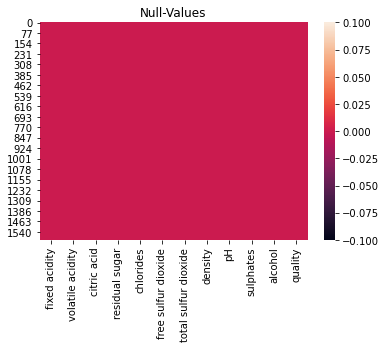

In [65]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- There are no null values in the dataset.

## Checking the no of values present in the columns.

In [67]:
df.notnull().sum()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

- There are total 1599 no of values in all the columns in the given dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Observing the mean , median and max values of the dataset

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Graphical Representation of the description 

<AxesSubplot:>

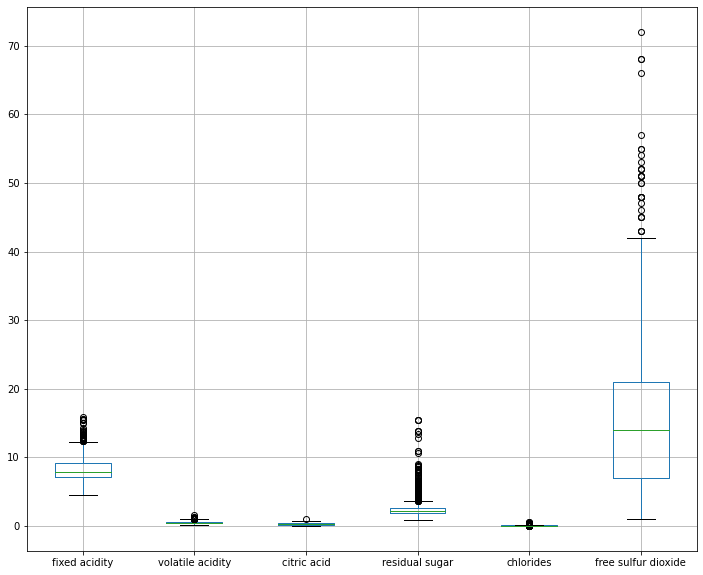

In [68]:
df.iloc[:,0:6].boxplot(figsize=(12,10))

- There are outliers present in the columns.

<AxesSubplot:>

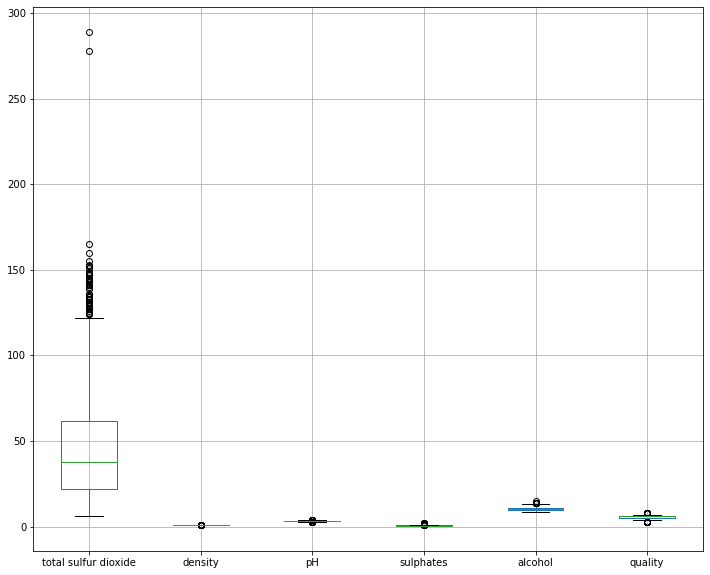

In [69]:
df.iloc[:,6:13].boxplot(figsize=(12,10))

- There are outliers present in the columns.

## Removing the outleirs

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [14]:
threhold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [15]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 1598, 1598, 1598]), array([ 0,  1,  2, ...,  9, 10, 11]))


In [16]:
df1=df[(z<3).all(axis=1)]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
df1.shape

(1451, 12)

## Correlation Graph

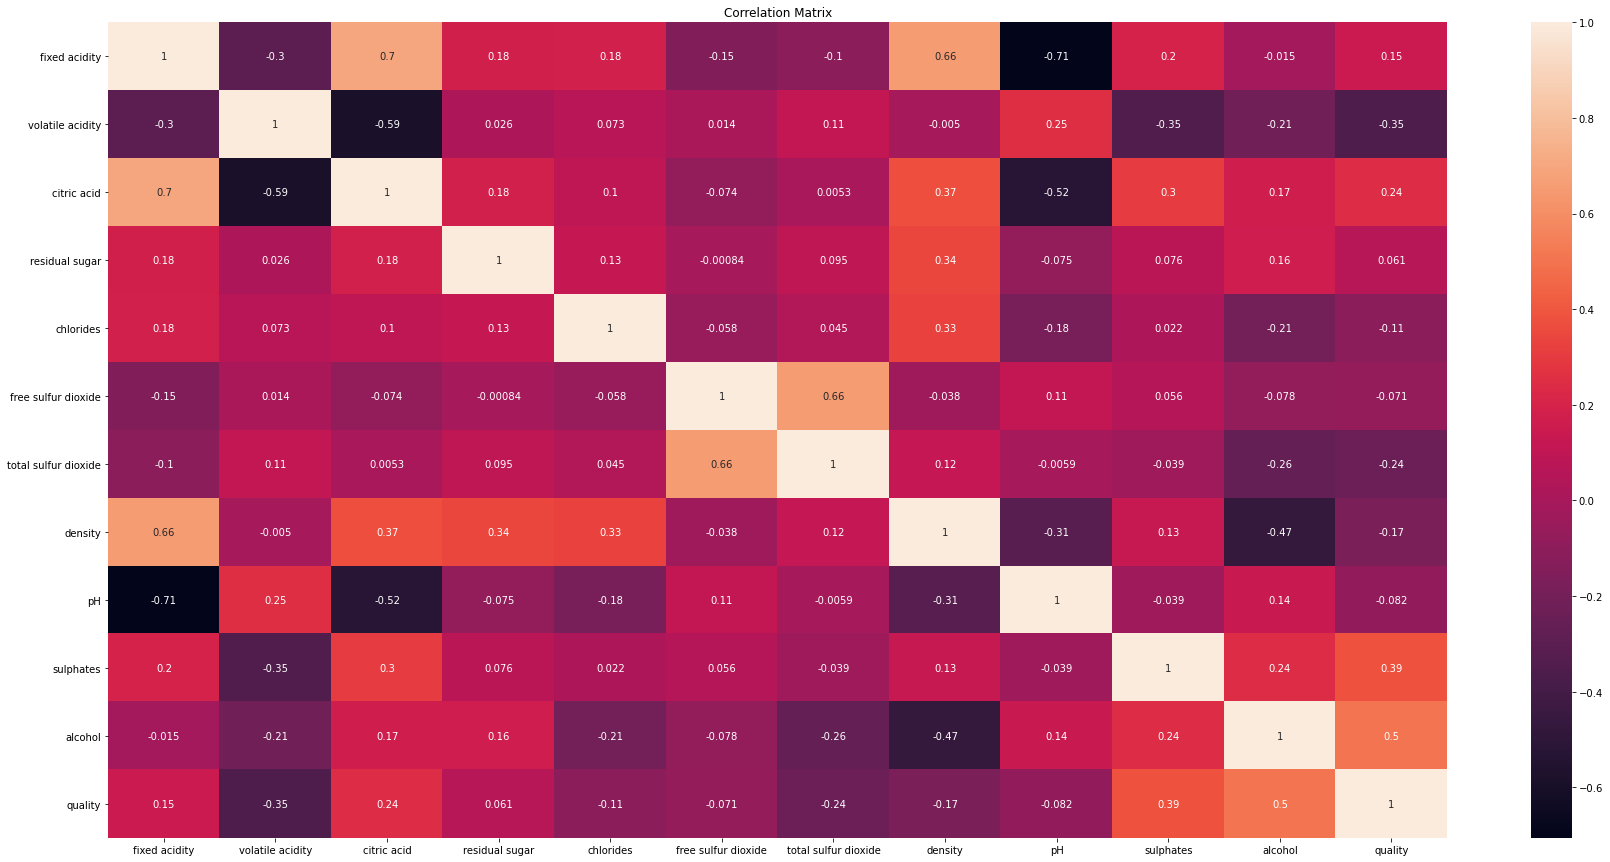

In [18]:
corr_mat=df1.corr()

plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

- The darkest shade shows the negative correation , which means it impacts the target variable in inversely proportional manner.
- The brighter shade indicates the high poisitive correlation with the target variable.

## Correlation Coefficient

In [72]:
corr_matrix=df1.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.501501
sulphates               0.386567
citric acid             0.243999
fixed acidity           0.145163
residual sugar          0.061482
free sulfur dioxide    -0.071202
pH                     -0.082164
chlorides              -0.108787
density                -0.167568
total sulfur dioxide   -0.237745
volatile acidity       -0.353443
Name: quality, dtype: float64

- The negative sign shows the negative correation , which means it impacts the target variable in inversely proportional manner.
- The positive no indicates the high poisitive correlation with the target variable.

### Seperating the target variable from other variables

In [74]:
x=df1.drop('quality' ,axis=1)
y=df1['quality']
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Graphical representation of dataset

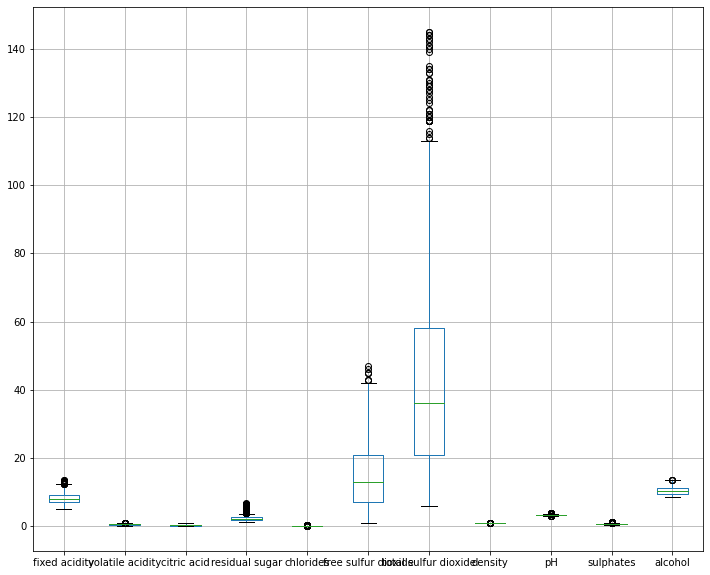

In [75]:
x.boxplot(figsize=[12,10])
plt.show()

- There are skewness and outliers present in the dataset.

## Handling the skewness of the dataset

In [76]:
x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [24]:
df_new.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

## Testing different model for the dataset

### Finding out the best random state for the dataset.

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(1,1451):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 1450


In [26]:
x.shape

(1451, 11)

In [27]:
y.shape

(1451,)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=22,random_state=1450)

### Naive Bayes Classifeir Model testing -

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [30]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predictionmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predictionmnb))
print(confusion_matrix(y_test,predictionmnb))
print(classification_report(y_test,predictionmnb))

0.36363636363636365
[[0 1 0 0]
 [0 3 4 2]
 [0 5 5 1]
 [0 0 1 0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.33      0.33      0.33         9
           6       0.50      0.45      0.48        11
           7       0.00      0.00      0.00         1

    accuracy                           0.36        22
   macro avg       0.21      0.20      0.20        22
weighted avg       0.39      0.36      0.37        22



In [31]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predictiongnb=gnb.predict(x_test)
print(accuracy_score(y_test,predictiongnb))
print(confusion_matrix(y_test,predictiongnb))
print(classification_report(y_test,predictiongnb))

0.5909090909090909
[[0 1 0 0]
 [0 7 1 1]
 [0 4 6 1]
 [0 0 1 0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.58      0.78      0.67         9
           6       0.75      0.55      0.63        11
           7       0.00      0.00      0.00         1

    accuracy                           0.59        22
   macro avg       0.33      0.33      0.32        22
weighted avg       0.61      0.59      0.59        22



### Support Vecotr Classifier model testing -

In [32]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.45454545454545453
[[0 0 1 0]
 [0 3 6 0]
 [0 4 7 0]
 [0 0 1 0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.43      0.33      0.38         9
           6       0.47      0.64      0.54        11
           7       0.00      0.00      0.00         1

    accuracy                           0.45        22
   macro avg       0.22      0.24      0.23        22
weighted avg       0.41      0.45      0.42        22



In [33]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.6363636363636364
[[ 0  0  1  0]
 [ 0  3  6  0]
 [ 0  0 11  0]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       1.00      0.33      0.50         9
           6       0.58      1.00      0.73        11
           7       0.00      0.00      0.00         1

    accuracy                           0.64        22
   macro avg       0.39      0.33      0.31        22
weighted avg       0.70      0.64      0.57        22



In [34]:
def svckernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predictionsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predictionsvc))
    print(confusion_matrix(y_test,predictionsvc))
    print(classification_report(y_test,predictionsvc))

In [35]:
svckernel('poly')

0.6363636363636364
[[ 0  0  1  0]
 [ 0  3  6  0]
 [ 0  0 11  0]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       1.00      0.33      0.50         9
           6       0.58      1.00      0.73        11
           7       0.00      0.00      0.00         1

    accuracy                           0.64        22
   macro avg       0.39      0.33      0.31        22
weighted avg       0.70      0.64      0.57        22



In [36]:
svckernel('rbf')

0.45454545454545453
[[0 0 1 0]
 [0 3 6 0]
 [0 4 7 0]
 [0 0 1 0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.43      0.33      0.38         9
           6       0.47      0.64      0.54        11
           7       0.00      0.00      0.00         1

    accuracy                           0.45        22
   macro avg       0.22      0.24      0.23        22
weighted avg       0.41      0.45      0.42        22



### Decision Tree Classifier model testing -

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[ 1  0  0  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  1]]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         1

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



### Nearest neighbors model testing -

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.6818181818181818
[[0 1 0 0]
 [0 7 2 0]
 [0 4 7 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.58      0.78      0.67         9
           6       0.78      0.64      0.70        11
           7       1.00      1.00      1.00         1

    accuracy                           0.68        22
   macro avg       0.59      0.60      0.59        22
weighted avg       0.67      0.68      0.67        22



In [39]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [40]:
kneighbors(3)

0.7272727272727273
[[ 0  1  0  0]
 [ 1  5  3  0]
 [ 0  1 10  0]
 [ 0  0  0  1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.71      0.56      0.63         9
           6       0.77      0.91      0.83        11
           7       1.00      1.00      1.00         1

    accuracy                           0.73        22
   macro avg       0.62      0.62      0.61        22
weighted avg       0.72      0.73      0.72        22



In [41]:
kneighbors(4)

0.6818181818181818
[[0 1 0 0]
 [0 7 2 0]
 [0 4 7 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.58      0.78      0.67         9
           6       0.78      0.64      0.70        11
           7       1.00      1.00      1.00         1

    accuracy                           0.68        22
   macro avg       0.59      0.60      0.59        22
weighted avg       0.67      0.68      0.67        22



In [42]:
kneighbors(5)

0.5909090909090909
[[0 1 0 0]
 [0 6 3 0]
 [0 5 6 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.50      0.67      0.57         9
           6       0.67      0.55      0.60        11
           7       1.00      1.00      1.00         1

    accuracy                           0.59        22
   macro avg       0.54      0.55      0.54        22
weighted avg       0.58      0.59      0.58        22



In [43]:
kneighbors(7)

0.5
[[0 1 0 0]
 [0 6 3 0]
 [0 7 4 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.43      0.67      0.52         9
           6       0.57      0.36      0.44        11
           7       1.00      1.00      1.00         1

    accuracy                           0.50        22
   macro avg       0.50      0.51      0.49        22
weighted avg       0.51      0.50      0.48        22



In [44]:
kneighbors(8)

0.5454545454545454
[[0 1 0 0]
 [0 6 3 0]
 [0 6 5 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.46      0.67      0.55         9
           6       0.62      0.45      0.53        11
           7       1.00      1.00      1.00         1

    accuracy                           0.55        22
   macro avg       0.52      0.53      0.52        22
weighted avg       0.55      0.55      0.53        22



## Finding out the Cross Validation Score for each model tested

In [57]:
from sklearn.model_selection import cross_val_score

### MultinomialNB Model

In [58]:
cvs=cross_val_score(mnb,x,y,cv=5)
print('The cross validation score for MultinomialNB model is :',cvs.mean(),'.')
print('The difference between accuracy and crossvalidation score is : -0.07394865828566499 .')

The cross validation score for MultinomialNB model is : 0.43758502192202864 .
The difference between accuracy and crossvalidation score is : -0.07394865828566499 .


### GaussianNB Model


In [59]:
cvs=cross_val_score(gnb,x,y,cv=5)
print('The cross validation score for GaussianNB model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.028513072423488328  .')

The cross validation score for GaussianNB model is : 0.5623960184856026
The difference between accuracy and crossvalidation score is :0.028513072423488328  .


### Support Vector Classifier Model

In [60]:
cvs=cross_val_score(svc,x,y,cv=5)
print('The cross validation score for SupportVectorClassification model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :-0.029232244234021765.')

The cross validation score for SupportVectorClassification model is : 0.4837776987794763
The difference between accuracy and crossvalidation score is :-0.029232244234021765.


### Nearest Neighbor Model

In [61]:
cvs=cross_val_score(knn,x,y,cv=5)
print('The cross validation score for NearestNeighbor model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.2731099117732605.')

The cross validation score for NearestNeighbor model is : 0.4541628154994668
The difference between accuracy and crossvalidation score is : 0.2731099117732605.


### Decision Tree Classifier model

In [53]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.5423936485365564')

The cross validation score for DecisionTreeClassifier model is : 0.46243867756843227
The difference between accuracy and crossvalidation score is : 0.5423936485365564


- The minimum difference between the accuracy score and cross validatio score is for the Decision Tree Clasifier Model (-0.029232244234021765) so this is our best model.

## Saving the model

In [79]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open('pickledtcfile','wb'))

In [80]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([5, 6, 5, 6, 7, 6, 6, 6, 5, 4, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5])